# Plotting ML Algorithms Results for IQA Prediction

In [1]:
# Imports

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import style
import seaborn as sns

In [2]:
# Global var
JSON_FILENAME = "metrics2.json"
CSV_FILENAME = "targets2.csv"
CSV_FILENAME2 = "3params_targets2.csv"

# Color palette
colors = sns.color_palette()

In [3]:
# Read json file

# Open json
json_file = open(JSON_FILENAME)
# Open csv 1
csv_dataframe = pd.read_csv(CSV_FILENAME)
# Open csv 2
csv_dataframe_3params = pd.read_csv(CSV_FILENAME2)

# Return json object as dict
metrics_data = json.load(json_file)

# Drop column of csv 1
csv_dataframe.drop('Unnamed: 0', axis=1, inplace=True)
print(csv_dataframe.columns)

# Drop column of csv 2
csv_dataframe_3params.drop('Unnamed: 0', axis=1, inplace=True)
print(csv_dataframe_3params.columns)

Index(['Codigo Ponto', 'Data Coleta', 'y_test', 'svm_target', 'rf_target',
       'dt_target', 'mlp_target'],
      dtype='object')
Index(['Codigo Ponto', 'Data Coleta', 'y_test', 'svm_target', 'rf_target',
       'dt_target', 'mlp_target'],
      dtype='object')


In [4]:
# Organize R2 metrics for each algorithm

def organize_metrics(metric, metrics_data):
    
    if metric == "R2":
        r2_svm = []
        r2_rf = []
        r2_dt = []
        r2_mlp = []
        
        for item in metrics_data["SVM"]:
            r2_svm.append(item["R2"])

        for item in metrics_data["RF"]:
            r2_rf.append(item["R2"])

        for item in metrics_data["DT"]:
            r2_dt.append(item["R2"])

        for item in metrics_data["MLP"]:
            r2_mlp.append(item["R2"])

        return r2_svm, r2_rf, r2_dt, r2_mlp

    elif metric == "RMSE":
        rmse_svm = []
        rmse_rf = []
        rmse_dt = []
        rmse_mlp = []
        
        for item in metrics_data["SVM"]:
            rmse_svm.append(item["RMSE"])

        for item in metrics_data["RF"]:
            rmse_rf.append(item["RMSE"])

        for item in metrics_data["DT"]:
            rmse_dt.append(item["RMSE"])

        for item in metrics_data["MLP"]:
            rmse_mlp.append(item["RMSE"])

        return rmse_svm, rmse_rf, rmse_dt, rmse_mlp

    elif metric == "MSE":
            mse_svm = []
            mse_rf = []
            mse_dt = []
            mse_mlp = []
            
            for item in metrics_data["SVM"]:
                mse_svm.append(item["MSE"])
    
            for item in metrics_data["RF"]:
                mse_rf.append(item["MSE"])
    
            for item in metrics_data["DT"]:
                mse_dt.append(item["MSE"])
    
            for item in metrics_data["MLP"]:
                mse_mlp.append(item["MSE"])
    
            return mse_svm, mse_rf, mse_dt, mse_mlp

    elif metric == "MAE":
            mae_svm = []
            mae_rf = []
            mae_dt = []
            mae_mlp = []
            
            for item in metrics_data["SVM"]:
                mae_svm.append(item["MAE"])
    
            for item in metrics_data["RF"]:
                mae_rf.append(item["MAE"])
    
            for item in metrics_data["DT"]:
                mae_dt.append(item["MAE"])
    
            for item in metrics_data["MLP"]:
                mae_mlp.append(item["MAE"])
    
            return mae_svm, mae_rf, mae_dt, mae_mlp


r2_svm, r2_rf, r2_dt, r2_mlp = organize_metrics("R2", metrics_data)
rmse_svm, rmse_rf, rmse_dt, rmse_mlp = organize_metrics("RMSE", metrics_data)
mse_svm, mse_rf, mse_dt, mse_mlp = organize_metrics("MSE", metrics_data)
mae_svm, mae_rf, mae_dt, mae_mlp = organize_metrics("MAE", metrics_data)

In [5]:
# Defining x axis for plot

x_axis = list(range(9, 2, -1)) # representing number of parameters

## Plot All Results

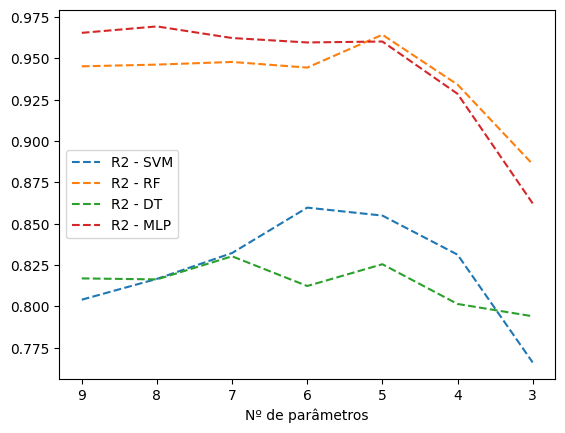

In [6]:
# R2 Line Plotting

fig, ax = plt.subplots()

r2_metric_svm = ax.plot(x_axis, r2_svm, color=colors[0], label="R2 - SVM", linestyle='--')
r2_metric_rf = ax.plot(x_axis, r2_rf, color=colors[1], label="R2 - RF", linestyle='--')
r2_metric_dt = ax.plot(x_axis, r2_dt, color=colors[2], label="R2 - DT", linestyle='--')
r2_metric_mlp = ax.plot(x_axis, r2_mlp, color=colors[3], label="R2 - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

#ax.set_title("Métrica R² - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.savefig("./images/metrics/R2_results_rank2.png", bbox_inches='tight')
plt.show()

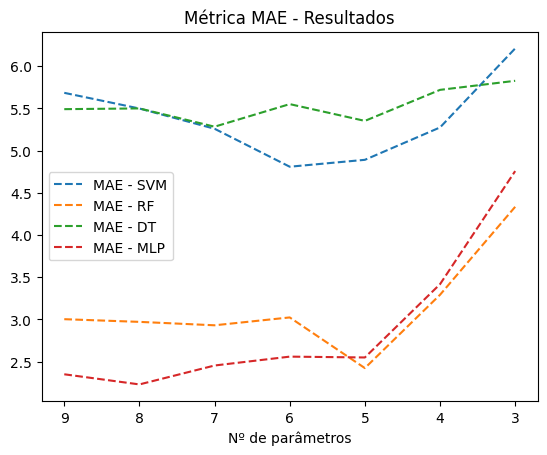

In [7]:
# MAE Line Plotting

fig, ax = plt.subplots()

rmse_metric_svm = ax.plot(x_axis, rmse_svm, color=colors[0], label="MAE - SVM", linestyle='--')
rmse_metric_rf = ax.plot(x_axis, rmse_rf, color=colors[1], label="MAE - RF", linestyle='--')
rmse_metric_dt = ax.plot(x_axis, rmse_dt, color=colors[2], label="MAE - DT", linestyle='--')
rmse_metric_mlp = ax.plot(x_axis, rmse_mlp, color=colors[3], label="MAE - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

ax.set_title("Métrica MAE - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.savefig("./images/metrics/MAE_results_rank2.png", bbox_inches='tight')
plt.show()

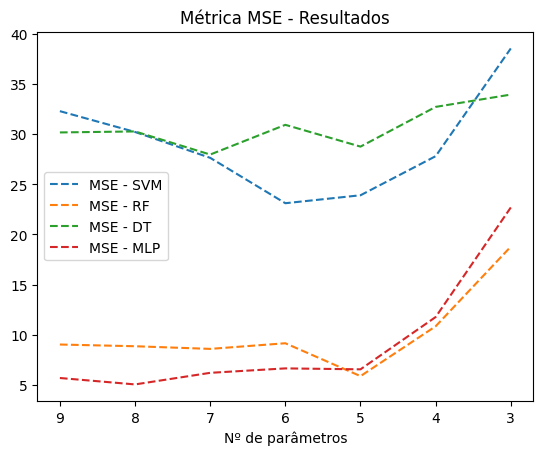

In [8]:
# MSE Line Plotting

fig, ax = plt.subplots()

rmse_metric_svm = ax.plot(x_axis, mse_svm, color=colors[0], label="MSE - SVM", linestyle='--')
rmse_metric_rf = ax.plot(x_axis, mse_rf, color=colors[1], label="MSE - RF", linestyle='--')
rmse_metric_dt = ax.plot(x_axis, mse_dt, color=colors[2], label="MSE - DT", linestyle='--')
rmse_metric_mlp = ax.plot(x_axis, mse_mlp, color=colors[3], label="MSE - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

ax.set_title("Métrica MSE - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.savefig("./images/metrics/MSE_results_rank2.png", bbox_inches='tight')
plt.show()

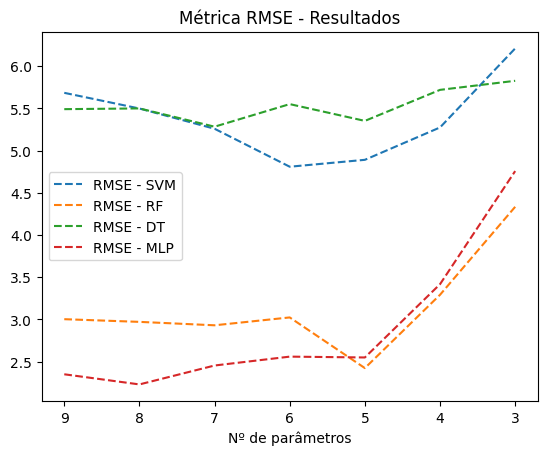

In [9]:
# RMSE Line Plotting

fig, ax = plt.subplots()

rmse_metric_svm = ax.plot(x_axis, rmse_svm, color=colors[0], label="RMSE - SVM", linestyle='--')
rmse_metric_rf = ax.plot(x_axis, rmse_rf, color=colors[1], label="RMSE - RF", linestyle='--')
rmse_metric_dt = ax.plot(x_axis, rmse_dt, color=colors[2], label="RMSE - DT", linestyle='--')
rmse_metric_mlp = ax.plot(x_axis, rmse_mlp, color=colors[3], label="RMSE - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

ax.set_title("Métrica RMSE - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.savefig("./images/metrics/RMSE_results_rank2.png", bbox_inches='tight')
plt.show()

## IQA esperado x IQA obtido - Todos os parâmetros

In [10]:
# Plot expected targets X predicted targets

csv_dataframe['Data Coleta'] = pd.to_datetime(csv_dataframe['Data Coleta'])

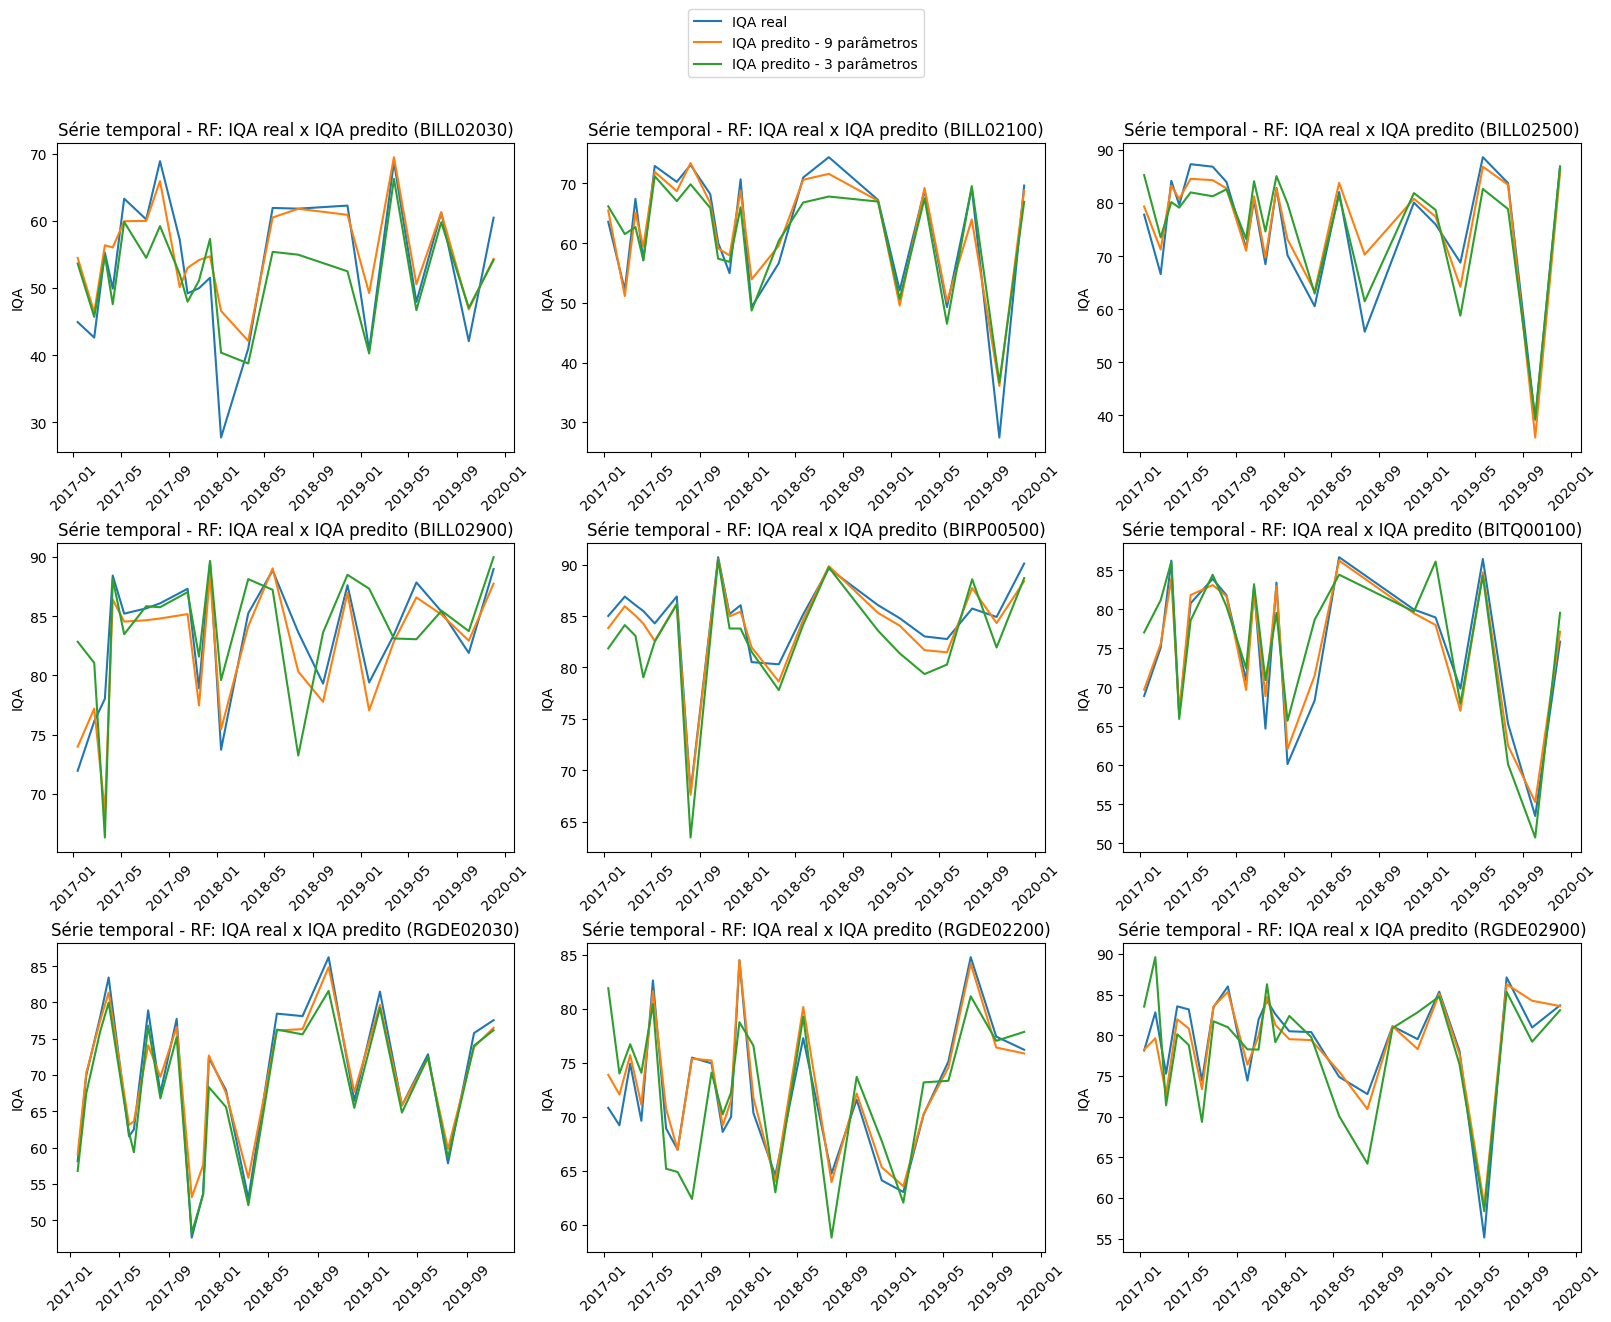

In [11]:
# Line Plot of observed values and predicted values
csv_dataframe_3params = csv_dataframe_3params.rename({'Codigo Ponto':'codigo', 'Data Coleta':'data', 'y_test':'y_test_3params', 
                                                      'svm_target':'svm', 'rf_target':'rf_target_3params', 'dt_target':'dt', 
                                                      'mlp_target':'mlp'}, axis=1)
targets_concatenated_data = pd.concat([csv_dataframe, csv_dataframe_3params], axis=1)
targets_data_consolidated = targets_concatenated_data.drop(columns=['codigo', 'data', 'svm_target', 'svm', 'dt', 'dt_target', 
                                                                    'mlp', 'mlp_target'])
targets_data_consolidated.transform(np.sort)

x_axis1 = targets_data_consolidated.loc[csv_dataframe['Codigo Ponto'] == 'BILL02030']
x_axis2 = targets_data_consolidated.loc[csv_dataframe['Codigo Ponto'] == 'BILL02100']
x_axis3 = targets_data_consolidated.loc[csv_dataframe['Codigo Ponto'] == 'BILL02500']
x_axis4 = targets_data_consolidated.loc[csv_dataframe['Codigo Ponto'] == 'BILL02900']
x_axis5 = targets_data_consolidated.loc[csv_dataframe['Codigo Ponto'] == 'BIRP00500']
x_axis6 = targets_data_consolidated.loc[csv_dataframe['Codigo Ponto'] == 'BITQ00100']
x_axis7 = targets_data_consolidated.loc[csv_dataframe['Codigo Ponto'] == 'RGDE02030']
x_axis8 = targets_data_consolidated.loc[csv_dataframe['Codigo Ponto'] == 'RGDE02200']
x_axis9 = targets_data_consolidated.loc[csv_dataframe['Codigo Ponto'] == 'RGDE02900']

axis_list = [x_axis1, x_axis2, x_axis3, x_axis4, x_axis5, x_axis6, x_axis7, x_axis8, x_axis9]
code_points_list = ['BILL02030', 'BILL02100', 'BILL02500', 'BILL02900', 'BIRP00500', 'BITQ00100', 'RGDE02030', 
                    'RGDE02200', 'RGDE02900']

fig, ax = plt.subplots(3, 3, figsize=(16, 12), layout='constrained')
code_point_index=0
for i in range(3):
    for j in range(3):
        ax[i,j].plot(axis_list[code_point_index]['Data Coleta'], 
                     axis_list[code_point_index]['y_test'], color=colors[0], label='IQA real')
        ax[i,j].plot(axis_list[code_point_index]['Data Coleta'], 
                     axis_list[code_point_index]['rf_target'], color=colors[1], label='IQA predito - 9 parâmetros')
        ax[i,j].plot(axis_list[code_point_index]['Data Coleta'], 
                     axis_list[code_point_index]['rf_target_3params'], color=colors[2], label='IQA predito - 3 parâmetros')
        ax[i,j].set_title(f"Série temporal - RF: IQA real x IQA predito ({code_points_list[code_point_index]})", fontdict={'fontsize': 12})
        ax[i,j].set_ylabel("IQA")
        ax[i,j].xaxis.set_tick_params(rotation=45)
        #ax[i,j].legend()
        code_point_index+=1

fig.legend(['IQA real', 'IQA predito - 9 parâmetros', 'IQA predito - 3 parâmetros'], loc='upper center', bbox_to_anchor = (0, 0.095, 1, 1))
plt.savefig("./images/WQIs/RF_WQIs_rank2.png", bbox_inches='tight')
plt.show()


## Algorithm metrics dataframe heatmap

In [12]:
Index = x_axis

Columns = ["SVM", "RF", "DT", "MLP"]

# setting font size to 15
plt.rcParams.update({'font.size': 15})

CMAP = sns.color_palette("coolwarm", as_cmap=True)
CMAP_R = sns.color_palette("coolwarm_r", as_cmap=True)

# Create algorithm Dataframes
r2_svm_series = pd.DataFrame(r2_svm, index=Index)
r2_rf_series = pd.DataFrame(r2_rf, index=Index)
r2_dt_series = pd.DataFrame(r2_dt, index=Index)
r2_mlp_series = pd.DataFrame(r2_mlp, index=Index)

rmse_svm_series = pd.DataFrame(rmse_svm, index=Index)
rmse_rf_series = pd.DataFrame(rmse_rf, index=Index)
rmse_dt_series = pd.DataFrame(rmse_dt, index=Index)
rmse_mlp_series = pd.DataFrame(rmse_mlp, index=Index)

mse_svm_series = pd.DataFrame(mse_svm, index=Index)
mse_rf_series = pd.DataFrame(mse_rf, index=Index)
mse_dt_series = pd.DataFrame(mse_dt, index=Index)
mse_mlp_series = pd.DataFrame(mse_mlp, index=Index)

mae_svm_series = pd.DataFrame(mae_svm, index=Index)
mae_rf_series = pd.DataFrame(mae_rf, index=Index)
mae_dt_series = pd.DataFrame(mae_dt, index=Index)
mae_mlp_series = pd.DataFrame(mae_mlp, index=Index)

# Create R2 dataframe
r2_df = pd.concat([r2_svm_series, r2_rf_series, r2_dt_series, r2_mlp_series], ignore_index=True, axis=1)
r2_df = pd.DataFrame(r2_df)
r2_df = r2_df.set_axis(Columns, axis=1)

# Create RMSE dataframe
rmse_df = pd.concat([rmse_svm_series, rmse_rf_series, rmse_dt_series, rmse_mlp_series], ignore_index=True, axis=1)
rmse_df = pd.DataFrame(rmse_df)
rmse_df = rmse_df.set_axis(Columns, axis=1)

# Create MSE dataframe
mse_df = pd.concat([mse_svm_series, mse_rf_series, mse_dt_series, mse_mlp_series], ignore_index=True, axis=1)
mse_df = pd.DataFrame(mse_df)
mse_df = mse_df.set_axis(Columns, axis=1)

# Create MAE dataframe
mae_df = pd.concat([mae_svm_series, mae_rf_series, mae_dt_series, mae_mlp_series], ignore_index=True, axis=1)
mae_df = pd.DataFrame(mae_df)
mae_df = mae_df.set_axis(Columns, axis=1)

### R²

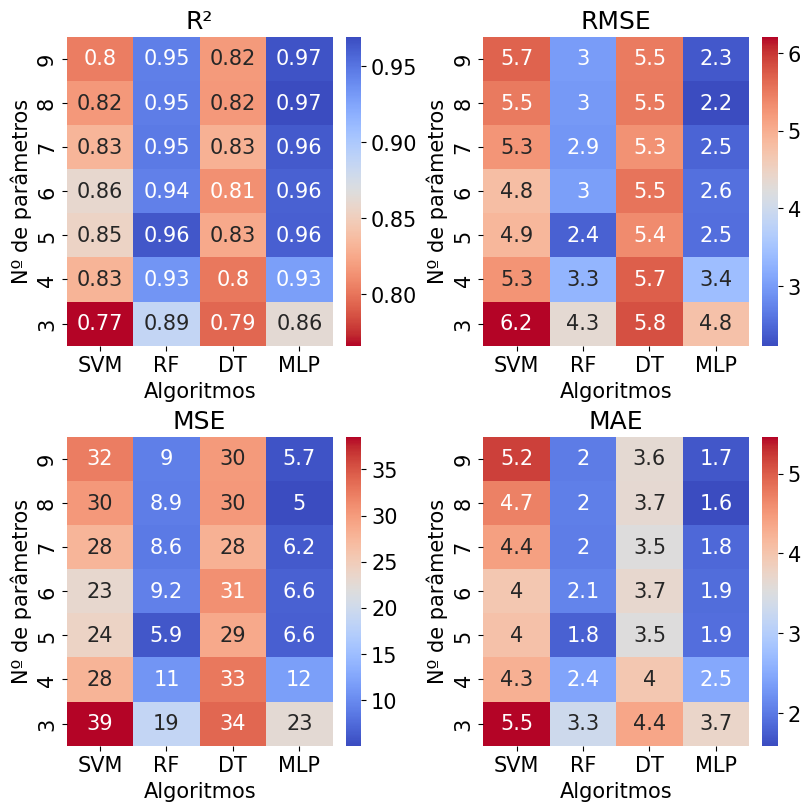

In [13]:
# Create heatmap with seaborn and title with matplotlib

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), layout='constrained')

ax[0,0] = sns.heatmap(r2_df, annot=True, cmap=CMAP_R, ax=ax[0,0])
ax[0,0].set(xlabel="Algoritmos", ylabel="Nº de parâmetros")
ax[0,0].set_title("R²")

ax[0,1] = sns.heatmap(rmse_df, annot=True, cmap=CMAP, ax=ax[0,1])
ax[0,1].set(xlabel="Algoritmos", ylabel="Nº de parâmetros")
ax[0,1].set_title("RMSE")

ax[1,0] = sns.heatmap(mse_df, annot=True, cmap=CMAP, ax=ax[1,0])
ax[1,0].set(xlabel="Algoritmos", ylabel="Nº de parâmetros")
ax[1,0].set_title("MSE")

ax[1,1] = sns.heatmap(mae_df, annot=True, cmap=CMAP, ax=ax[1,1])
ax[1,1].set(xlabel="Algoritmos", ylabel="Nº de parâmetros")
ax[1,1].set_title("MAE")

fig.savefig("./images/heatmaps/heatmaps_rank2.png", bbox_inches='tight')

plt.show()